In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord, Angle
from astropy.coordinates import Distance
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval

In [68]:
# --- Load Gaia cone catalog ---
tab = Table.read("Cone_GaiaDR3.fits", hdu=1)
ra  = np.array(tab["ra"], float)
dec = np.array(tab["dec"], float)
good = np.isfinite(ra) & np.isfinite(dec)
ra, dec = ra[good], dec[good]

In [69]:
print(f"Gaia catalog center (ICRS): RA = {c_center_icrs.ra.deg:.6f}°, Dec = {c_center_icrs.dec.deg:.6f}°")
print(f"Gaia catalog center (Galactic): l = {c_center_gal.l.deg:.6f}°, b = {c_center_gal.b.deg:.6f}°")

Gaia catalog center (ICRS): RA = 280.689186°, Dec = -4.034255°
Gaia catalog center (Galactic): l = 28.352643°, b = 0.088252°


In [70]:
# --- Load Spitzer image (Galactic WCS) ---
with fits.open("GLM_02850_0000_mosaic_I1.fits") as hdul:
    wcs  = WCS(hdul[0].header)
    data = hdul[0].data

# --- Load Gaia (ICRS) and convert to Galactic ---
tab = Table.read("Cone_GaiaDR3.fits", hdu=1)
ra  = np.array(tab["ra"], float)
dec = np.array(tab["dec"], float)
good = np.isfinite(ra) & np.isfinite(dec)
c_icrs = SkyCoord(ra[good]*u.deg, dec[good]*u.deg, frame="icrs")
c_gal  = c_icrs.galactic
l = c_gal.l.deg
b = c_gal.b.deg

In [85]:
# pull parallax columns (mas)
plx     = np.array(tab["parallax"], float)[good]
plx_err = np.array(tab["parallax_error"], float)[good]

# 2) Build your parallax band (and optional S/N) on the sliced arrays:
finite = np.isfinite(plx) & np.isfinite(plx_err)
band   = (plx > 0.15) & (plx < 0.25)        # 0.15–0.25 mas ≈ 6.7–4.0 kpc

plx_mask = finite & band

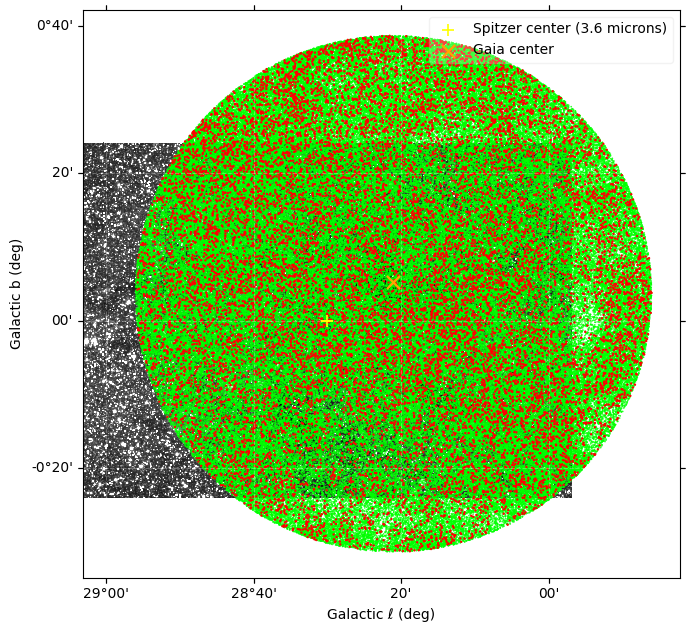

In [87]:
# plot
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=wcs)

vmin, vmax = ZScaleInterval().get_limits(data)
im = ax.imshow(data, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)

# lock limits so scatter won't autoscale
# xlim, ylim = ax.get_xlim(), ax.get_ylim()
# ax.autoscale(False)

# gaia scatter
sc = ax.scatter(l, b,
                transform=ax.get_transform("galactic"),
                s=0.6, facecolors="none", edgecolors="lime", lw=0.4,
                zorder=0.5, clip_on=True)
# sc.set_clip_path(ax.patch)
# ax.set_xlim(xlim); ax.set_ylim(ylim)

# gaia scatter with parallax mask
sc = ax.scatter(l[plx_mask], b[plx_mask],
                transform=ax.get_transform("galactic"),
                s=3, facecolors="red", edgecolors="none", lw=0.4,
                zorder=0.5, clip_on=True)

# centers: header (CRVAL) and data center
crval = wcs.wcs.crval  # native WCS coords (ℓ,b here)
ny, nx = data.shape
cx, cy = nx/2.0, ny/2.0
center_world = wcs.pixel_to_world(cx, cy).galactic
ax.scatter([crval[0]], [crval[1]], transform=ax.get_transform("world"),
           s=70, marker="+", color="yellow", lw=1.2, zorder=4, label="Spitzer center (3.6 microns)")

# on existing axes 'ax' with Galactic WCS:
ax.scatter([c_center_gal.l.deg], [c_center_gal.b.deg],
           transform=ax.get_transform("galactic"),
           s=90, marker="x", color="orange", lw=1.6, zorder=5, label="Gaia center")
ax.legend(loc="upper right", frameon=True, framealpha=0.25)

# labels/grid
ax.set_xlabel("Galactic ℓ (deg)"); ax.set_ylabel("Galactic b (deg)")
ax.coords.grid(color="white", ls="--", alpha=0.3)

ax.legend(loc="upper right", frameon=True, framealpha=0.25)
plt.tight_layout(); plt.show()

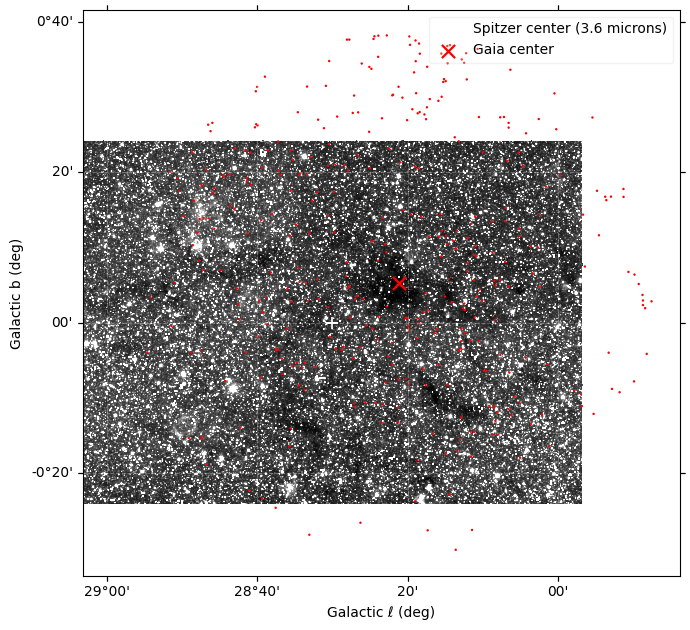

In [83]:
# plot
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=wcs)

vmin, vmax = ZScaleInterval().get_limits(data)
im = ax.imshow(data, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)

# lock limits so scatter won't autoscale
# xlim, ylim = ax.get_xlim(), ax.get_ylim()
# ax.autoscale(False)

# gaia scatter with parallax mask
sc = ax.scatter(l[plx_mask], b[plx_mask],
                transform=ax.get_transform("galactic"),
                s=3, facecolors="red", edgecolors="none", lw=0.4,
                zorder=0.5, clip_on=True)
# sc.set_clip_path(ax.patch)
# ax.set_xlim(xlim); ax.set_ylim(ylim)

# centers: header (CRVAL) and data center
crval = wcs.wcs.crval  # native WCS coords (ℓ,b here)
ny, nx = data.shape
cx, cy = nx/2.0, ny/2.0
center_world = wcs.pixel_to_world(cx, cy).galactic
ax.scatter([crval[0]], [crval[1]], transform=ax.get_transform("world"),
           s=70, marker="+", color="white", lw=1.2, zorder=4, label="Spitzer center (3.6 microns)")

# on existing axes 'ax' with Galactic WCS:
ax.scatter([c_center_gal.l.deg], [c_center_gal.b.deg],
           transform=ax.get_transform("galactic"),
           s=90, marker="x", color="red", lw=1.6, zorder=5, label="Gaia center")
ax.legend(loc="upper right", frameon=True, framealpha=0.25)

# labels/grid
ax.set_xlabel("Galactic ℓ (deg)"); ax.set_ylabel("Galactic b (deg)")
ax.coords.grid(color="white", ls="--", alpha=0.3)

ax.legend(loc="upper right", frameon=True, framealpha=0.25)
plt.tight_layout(); plt.show()

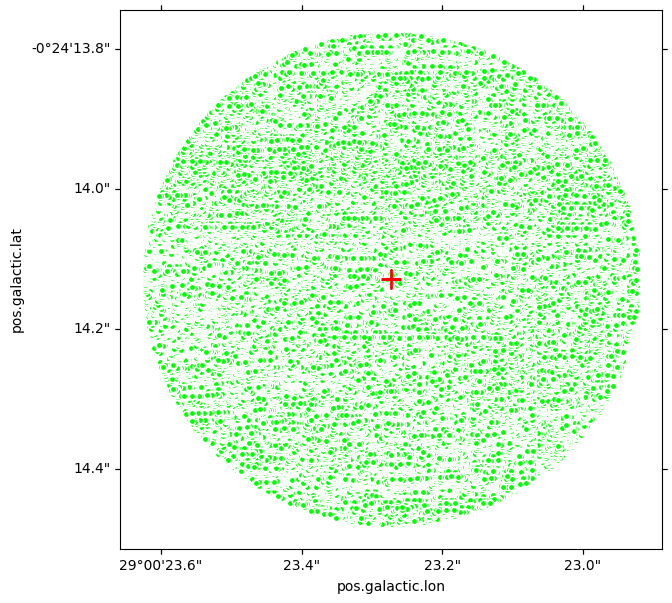

In [74]:
# plot
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=wcs)

# gaia scatter (low zorder so overlays can sit above)
ax.scatter(ra, dec, color = 'lime', edgecolor = 'w', s = 20, label = f"Gaia #{len(ra)}")

raCenter = "18h42m51s"
decCenter = "-04d02m54s"
coord = SkyCoord(ra=raCenter, dec=decCenter, unit=(u.hourangle, u.deg))
plt.plot(coord.ra.deg, coord.dec.deg, 'r+', markersize=15, mew=2,label="Center")